# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [4]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import fetch_openml

In [5]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [8]:
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

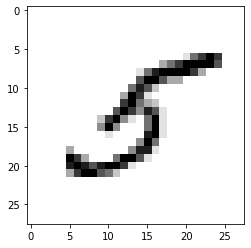

In [9]:
# X_res = X.reshape(28,28)

plt.figure(figsize=(20,4))


plt.imshow(X[35].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [10]:
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [11]:
X_train = X[:60000]

X_test = X[60000:]

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_train = y[:60000]

y_test = y[60000:]

In [15]:
y_train.shape

(60000,)

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [16]:
list_y = list(y)

In [17]:
list_5y = [i for i in range(len(y)) if list_y[i] == '5']

In [18]:
list_5y

[0,
 11,
 35,
 47,
 65,
 100,
 132,
 138,
 145,
 173,
 175,
 182,
 191,
 219,
 236,
 239,
 244,
 259,
 266,
 273,
 278,
 284,
 287,
 306,
 316,
 328,
 332,
 335,
 376,
 396,
 403,
 407,
 417,
 420,
 437,
 463,
 474,
 480,
 496,
 502,
 504,
 512,
 513,
 514,
 516,
 523,
 537,
 543,
 544,
 554,
 579,
 610,
 614,
 620,
 622,
 625,
 635,
 652,
 653,
 679,
 690,
 699,
 719,
 722,
 748,
 751,
 757,
 768,
 771,
 775,
 778,
 799,
 805,
 815,
 832,
 836,
 837,
 845,
 879,
 886,
 899,
 912,
 915,
 916,
 921,
 924,
 947,
 956,
 960,
 964,
 970,
 985,
 1024,
 1032,
 1039,
 1062,
 1071,
 1087,
 1089,
 1104,
 1109,
 1111,
 1135,
 1162,
 1206,
 1210,
 1222,
 1245,
 1263,
 1265,
 1276,
 1278,
 1283,
 1285,
 1288,
 1298,
 1311,
 1313,
 1324,
 1325,
 1328,
 1340,
 1356,
 1382,
 1402,
 1406,
 1413,
 1420,
 1430,
 1433,
 1442,
 1467,
 1468,
 1481,
 1482,
 1485,
 1490,
 1509,
 1514,
 1516,
 1524,
 1526,
 1556,
 1575,
 1577,
 1587,
 1592,
 1615,
 1635,
 1638,
 1650,
 1670,
 1690,
 1691,
 1702,
 1721,
 1752,

In [19]:
X5s = [X[i] for i in list_5y]

In [20]:
# Using NP Where to replace in Y all 5 by 1 & other numbers by 0

In [21]:
y_5_train = np.where(y_train=='5',1,0)

y_5_test = np.where(y_test=='5',1,0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [23]:
LogReg = LogisticRegression()

In [24]:
X5s

[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [25]:
LogReg.fit(X_train, y_5_train)

c:\users\langl\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
LogReg.score(X_train, y_5_train)

0.9778166666666667

In [27]:
y_5_predict = LogReg.predict(X_test)

In [28]:
r2_score(y_5_test,y_5_predict)

0.7279777695063325

#### Does the classifier predict correctly the 35th digit we picked before?

In [29]:
LogReg.predict(X_train)[35]

1

In [30]:
# it did predit correctly #35 value

#### The 35th value is a 5. Check if it was correctly predicted.

In [31]:
# your code here

In [32]:
# your comments here

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [33]:
# Libraries
from sklearn.base import BaseEstimator

In [34]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [35]:
never_5_clf.fit(X_train, y_train)

In [36]:
y_no_5 = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

##### Logistic Regression part

In [37]:
# Confusion Matrix

In [38]:
conf5 = confusion_matrix(y_5_test, y_5_predict)

In [39]:
# Precision

In [40]:
prec5 = precision_score(y_5_test, y_5_predict)

In [41]:
# Recall

In [42]:
rec5 = recall_score(y_5_test, y_5_predict)

In [43]:
# F1 Scores

In [44]:
score_5 = f1_score(y_5_test, y_5_predict)

In [45]:
print(f'the confusion matrix is of {conf5}')

print(f'the precision_score is of {prec5}')

print(f'the recall_score is of {rec5}')

print(f'the f1_score final is of {score_5}')

the confusion matrix is of [[9034   74]
 [ 147  745]]
the precision_score is of 0.9096459096459096
the recall_score is of 0.8352017937219731
the f1_score final is of 0.8708357685563999


### Dummy Never5Classifier function part

In [46]:
conf_dummy = confusion_matrix(y_5_test, y_no_5)

In [47]:
conf_dummy

array([[9108,    0],
       [ 892,    0]], dtype=int64)

In [48]:
pre_dummy = precision_score(y_5_test, y_no_5)
pre_dummy

c:\users\langl\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [49]:
rec_dummy = recall_score(y_5_test, y_no_5)
rec_dummy

0.0

In [50]:
f1_dummy = f1_score(y_5_test, y_no_5)
f1_dummy

0.0

In [51]:
print(f'the confusion matrix is of {conf_dummy}')

print(f'the precision_score is of {pre_dummy}')

print(f'the recall_score is of {rec_dummy}')

print(f'the f1_score final is of {f1_dummy}')

the confusion matrix is of [[9108    0]
 [ 892    0]]
the precision_score is of 0.0
the recall_score is of 0.0
the f1_score final is of 0.0


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [52]:
# The Model with the dummy Never5Classifier() is bad, since it encodes all the results in the same 'Not 5' categories
# therefore, including the 5 ; so it is not of much used since it cannot Classify correctly any data, it just encodes everything
# as "Not 5"

# The Model created with the Logistic Regression is not perfect , but has scores over 80% overall 

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [59]:
from sklearn.metrics import roc_curve

In [73]:
#ROC_Curve score for the original LogReg
fpr_5, tpr_5, thresholds_5 = roc_curve(y_5_test, y_5_predict)

In [74]:
fpr_5, tpr_5, thresholds_5

(array([0.        , 0.00812473, 1.        ]),
 array([0.        , 0.83520179, 1.        ]),
 array([2, 1, 0]))

In [75]:
#ROC_Curve score for the original LogReg
fpr_no5, tpr_no5, thresholds_no5 = roc_curve(y_5_test, y_no_5)

In [76]:
fpr_no5, tpr_no5, thresholds_no5

(array([0., 1.]), array([0., 1.]), array([1., 0.]))

Text(0.5, 1.0, 'Dummy No 5 ROC Curve _ not usable')

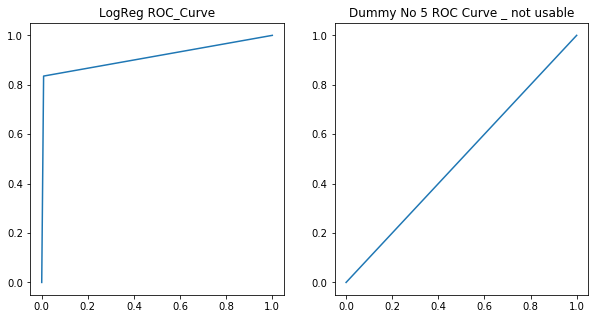

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(fpr_5, tpr_5)
ax[0].set_title('LogReg ROC_Curve')
ax[1].plot(fpr_no5, tpr_no5)
ax[1].set_title('Dummy No 5 ROC Curve _ not usable')

#### Now find the roc_auc_score for each. 

In [83]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y_5_test, y_5_predict)

0.9135385341029717

In [86]:
roc_auc_score(y_5_test, y_no_5)

0.5

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [55]:
# The Logistic Regression works way better than the Dummy Classifier of 50% Accuracy